This uses the functional API in Keras following 

https://www.tensorflow.org/guide/keras/functional

I analyzes...

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

% tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Input, layers
tf.keras.backend.clear_session() # for easy reset of notebook state

import numpy as np

from matplotlib import pyplot as plt
from IPython import display

TensorFlow 2.x selected.


In [0]:
inputs = keras.Input(shape=(784,))
# inpurt_tensor = keras.Input(shape=(32,32,3)) if it is a 32x32 rgb image
dense = layers.Dense(64, activation = 'relu')
x = dense(inputs)
x = layers.Dense(64,activation = 'relu')(x)
outputs = layers.Dense(10)(x)

In [0]:
model = keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_model')

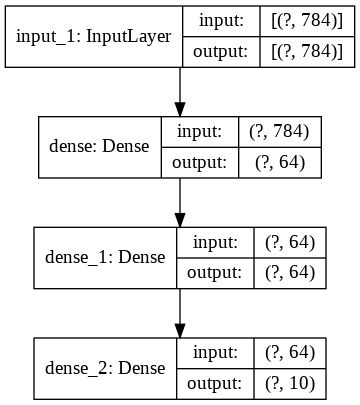

In [4]:
# need to install pydot (pip) and graphviz (conda)
keras.utils.plot_model(model, 'first_model_graph.png', show_shapes = True)

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

11493376/11490434 [==============================] - 0s 0us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3347 - accuracy: 0.9047 - val_loss: 0.1817 - val_accuracy: 0.9475
Epoch 2/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.1632 - accuracy: 0.9506 - val_loss: 0.1349 - val_accuracy: 0.9613
Epoch 3/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.1213 - accuracy: 0.9644 - val_loss: 0.1268 - val_accuracy: 0.9628
Epoch 4/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.0975 - accuracy: 0.9714 - val_loss: 0.1206 - val_accuracy: 0.9661
Epoch 5/5
48000/48000 [==============================] - 2s 48us/sample - loss: 0.0812 - accuracy: 0.9762 - val_loss: 0.1112 - val_accuracy: 0.9684
10000/10000 - 0s - loss: 0.1075 - accuracy: 0.9682
Test loss: 0.107499476764258
Test accuracy: 0.9682


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!ls /content/gdrive/My\ Drive

In [17]:
!mkdir /content/gdrive/My\ Drive/models

mkdir: cannot create directory ‘/content/gdrive/My Drive/models’: File exists


In [0]:
model_name = 'functional_api_mnist_0'
path = f'/content/gdrive/My Drive/models/{model_name}'

In [19]:
path

'/content/gdrive/My Drive/models/functional_api_mnist_0'

In [20]:
model.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/models/functional_api_mnist_0/assets


In [0]:
del model

In [0]:
model = keras.models.load_model(path)

In [0]:
predictions = model.predict(x_test)

Study this:

https://www.tensorflow.org/guide/keras/save_and_serialize

Continue the tutorial here:

## Use the same graph of layers to define multiple models

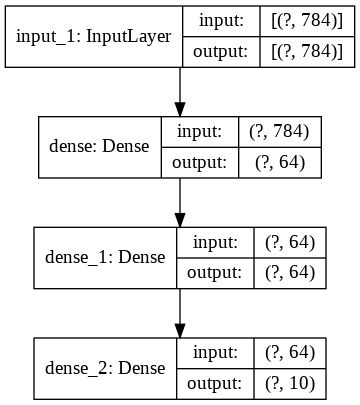

In [25]:
# encoder

inputs = keras.layers.Input(shape = (28,28,1), name = 'img')
x = layers.Conv2D(16,3, activation = 'relu')(inputs) # second int specifies window of convolution
x = layers.Conv2D(32,3,activation = 'relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32,3, activation = 'relu')(x)
x = layers.Conv2D(16,3,activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(inputs = inputs, outputs = encoder_output, name = 'encoder')
# need to install pydot (pip) and graphviz (conda)
keras.utils.plot_model(model, 'first_model_graph.png', show_shapes = True)

Note: calling a model calls architecture & weights

In [26]:
decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145 